# $$\textbf{Python Programming for Machine Learning} $$ 

#### $$\text{SoSe 2020}$$

## $$\text{Lecture 3: Randomness, Automatic differentiation, Cython} $$

#### $$\text{Sergej Dogadov} \quad \text{Philine Thalia Görzig} \quad \text{Panagiotis Tomer Karagiannis}$$

<center>
<img src='images/pyt.png' width=250>

## $$\textbf{NumPy subpackage for random variables}$$
<hr>
<br>
<center>
    <img src='./images/dice.png' width='200'>

In [1]:
from numpy import random as rnd 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## $$\textbf{Sampling}$$
<hr>
<br>

* $\text{Draw random samples from a uniform distribution.}$

In [2]:
min_value = -1
max_value = 1
number_of_samples = 300

U = rnd.uniform(min_value, max_value, size=number_of_samples) # uniform samples in range (min_value, max_value)

f"Mean: {U.mean():.3f} Variance: {U.var():.2f} Std: {U.std():.2f}"

'Mean: 0.083 Variance: 0.32 Std: 0.57'

* $\text{Visualize 1-dim samples.}$

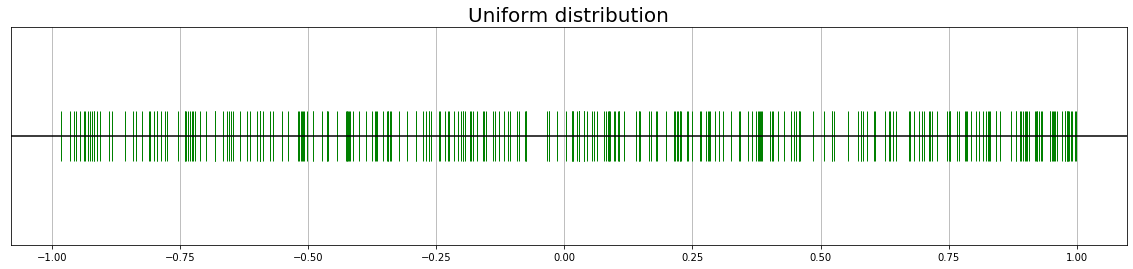

In [3]:
plt.figure(figsize=(20,4))
plt.title('Uniform distribution', fontsize=20)

plt.plot(U,np.zeros_like(U), '|', c='g', ms=50, label='samples')
plt.axhline(y = 0, color='k')
plt.grid(axis='x')
_=plt.yticks([])

## $$\textbf{ Represent samples using the histogram plot}$$
<hr>
<br>

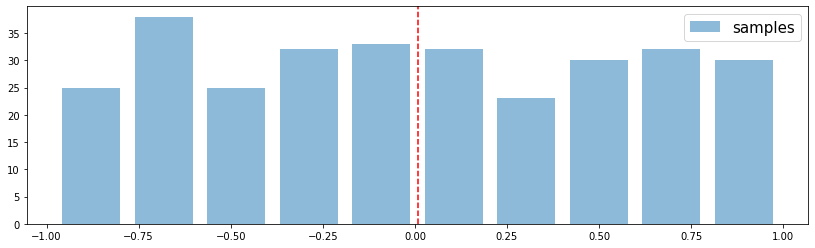

In [13]:
plt.figure(figsize=(14,4))

plt.hist(U, bins=10, rwidth=0.8, alpha=0.5, label='samples') # num of bins, block width percentage
plt.axvline(x=U.mean(), ls='--',  c='r') # plot dashed mean line
plt.legend(fontsize=15)

In [9]:
# Equivalently in numpy: 
nums, ranges = np.histogram(U, bins=30)
nums, ranges

(array([ 9, 11,  5, 12, 18,  8,  8,  7, 10,  9,  9, 14, 10, 10, 13, 12, 12,
         8,  8,  4, 11, 14,  9,  7,  9, 13, 10,  9,  7, 14]),
 array([-0.97670146, -0.91110856, -0.84551566, -0.77992277, -0.71432987,
        -0.64873697, -0.58314407, -0.51755117, -0.45195827, -0.38636538,
        -0.32077248, -0.25517958, -0.18958668, -0.12399378, -0.05840088,
         0.00719201,  0.07278491,  0.13837781,  0.20397071,  0.26956361,
         0.33515651,  0.4007494 ,  0.4663423 ,  0.5319352 ,  0.5975281 ,
         0.663121  ,  0.7287139 ,  0.79430679,  0.85989969,  0.92549259,
         0.99108549]))

## $$\textbf{Univariate-normal (Gaussian) distribution}$$
<hr>
<br>

In [29]:
# fix the random seed for debuging
np.random.seed(42)  # any value

In [32]:
mean = 2
std = 8
X = rnd.normal(loc=mean, scale=std, size=500)

f'Mean: {X.mean():.3f} Variance: {X.var():.2f} Std: {X.std():.2f}'

'Mean: 1.394 Variance: 62.43 Std: 7.90'

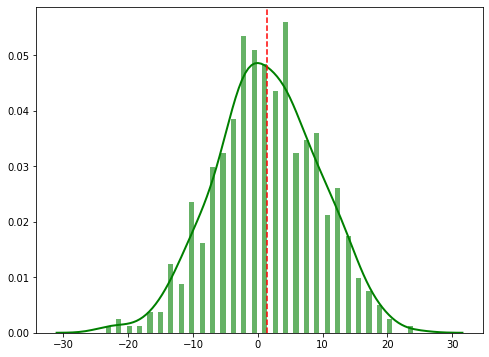

In [35]:
plt.figure(figsize=(8,6))
plt.hist(X, bins=30, density=True, alpha=0.6, rwidth=0.5, color='g')

from seaborn import kdeplot

kdeplot(X,linewidth=2, color='g')
_=plt.axvline(X.mean(), ls='--', c='r')

## $$\textbf{Multiple Gaussian distribution}$$
<hr>
<br>

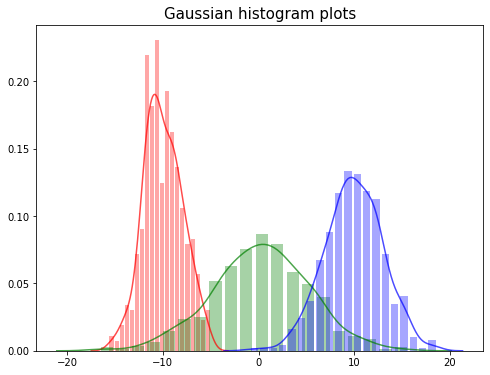

In [38]:
means = [-10, 0, 10]
stds = [2, 5, 3]
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(8,6))

for n, mu in enumerate(means): # given additionaly a counter back
    std = stds[n]
    col = colors[n]
    
    data = rnd.normal(mu, std, size=500)
    plt.hist(data, bins=20, color=col, alpha=0.35, rwidth=0.8, density=True)
    kdeplot(data, color=col, alpha=0.7)
    
_=plt.title('Gaussian histogram plots', fontsize=15)    

### $$\textbf{Gaussian histogram plot with subplots}$$
<hr>

def plot_gaussians(means, stds, size=250, bins=25):
    N = len(means)
    fig, axis = plt.subplots(nrows=N, ncols=N, sharey=True, figsize=(20,14))

    R,C = axis.shape

    for r in range(R):
        for c in range(C):
            data = rnd.normal(means[r],stds[c], size=size)
            
            ax = axis[r,c]
            ax.hist(data, bins=bins, rwidth=0.8, density=True, color='g', alpha=0.5, label='data')
            ax.axvline(data.mean(), ls='--', c='r', ymax=.8, label='$\\mu =$'+f'{data.mean():0.2f}')
            ax.set_xticks(means)
            ax.legend()
            ax.grid(axis='y')
            kdeplot(data, ax=ax, color='k')
            
    ttl = axis[0,1].set_title('Gaussian histogram plots', fontsize=25)
    ttl.set_position([1.5, 1.25])

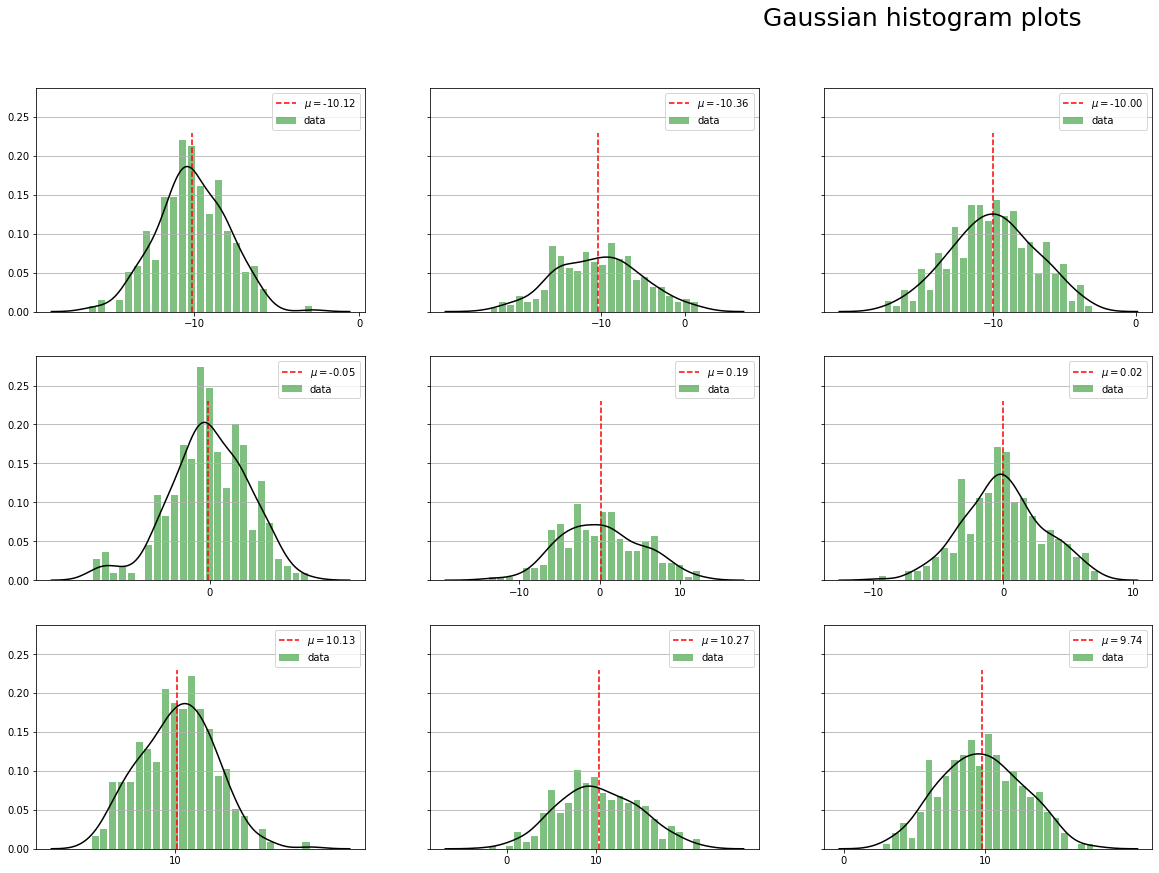

In [45]:
plot_gaussians(means,stds)

## $$\textbf{Probability density function}$$
<hr>
<br>

* $\text{Gaussian PDF}$

$$\boxed{\small{\mathcal{N}(x | \mu, \sigma)} = 
\frac{1}{\sigma\sqrt{2\pi}}\exp{\Big(-\frac{(x - \mu)^2}{2\sigma^2}\Big)}}$$

In [47]:
def gauss_pdf(X, mu=0, sigma=1):
    #                                           (N,d) - (d) = (N,d)
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(X - mu)**2/(2*sigma**2))

In [55]:
mean = 2
std = 4
X = np.sort(rnd.normal(loc=mean, scale=std, size=10000))

g_pdf = gauss_pdf(X, mean, std)
print(g_pdf.shape)

(10000,)


In [52]:
from scipy.stats import norm

n_pdf = norm.pdf(X, loc=mean, scale=std)
assert np.allclose(g_pdf, n_pdf)

### $$\textbf{Gaussian histogram plot}$$
<hr>

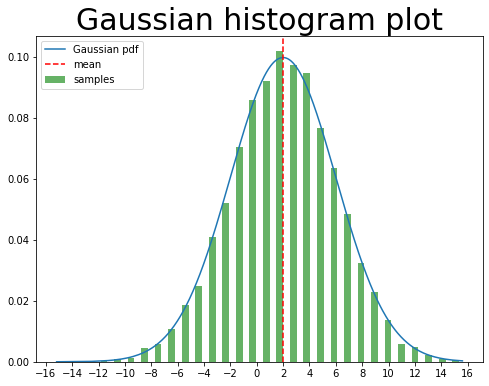

In [56]:
plt.figure(figsize=(8,6))
plt.hist(X, bins=30, density=True, alpha=0.6, rwidth=0.5, color='g', label='samples')

plt.plot(X, g_pdf, label='Gaussian pdf')

plt.xticks(np.arange(-16,18,2))
plt.axvline(X.mean(), ls='--', c='r', label='mean')
plt.title('Gaussian histogram plot', fontsize=30)
_=plt.legend(loc=2)

## $$\textbf{Multinomial distribution}$$
<hr>

* $\text{Let's draw some random samples from a multinomial distribution. We'll use our fruits from the first lecture.}$
<br>
<center>
    <img src='./images/fruits.png', width='900'>

In [57]:
fruits = np.array([
    'watermelon',
    'apple',
    'grape',
    'grapefruit',
    'lemon',
    'banana',
    'cherry'
])

## $$\textbf{Sample from multinomial}$$
<hr>

In [79]:
n = 5 # number of samples

p = np.ones(len(fruits)).flatten()/len(fruits) # represents equal sampling probability

all_fruits = np.tile(fruits, (n,1)) # repeat multiple (5) times to represent all possible picks
print(all_fruits)

print(50*'--')

mlt = rnd.multinomial(1, p, size=(5)) # draw multinomial samples 5 times with the given probability
print(mlt)
mlt = mlt.astype(bool)
print(mlt)

samples = all_fruits[mlt] # select drown samples from all fruits

[['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']]
----------------------------------------------------------------------------------------------------
[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]]
[[False False False False  True False False]
 [False False False  True False False False]
 [False False  True False False False False]
 [False False False False False False  True]
 [False False False  True False False False]]


In [69]:
list(samples)

['apple', 'watermelon', 'grape', 'lemon', 'cherry']

## $$\textbf{Adjust selection probabilities}$$
<hr>

In [83]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities to pick a fruit
n = 100000

all_fruits = np.tile(fruits, (n,1))

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with given probabilities
#print(mlt) # mask as 0 or 1 ints

samples = all_fruits[mlt.astype(bool)] # show drown samples
#print(list(samples))

np.mean(mlt.astype(bool), 0)

array([0.05107, 0.70006, 0.04997, 0.05007, 0.04992, 0.04965, 0.04926])

## $$\textbf{ Another way to make discrete choices}$$
<hr>

<center>
    <img src='./images/sampling.png', width='600'>

In [112]:

p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]

temp = [0] + p[:-1]
print(temp)
# Cumulate them
l = np.cumsum(temp) # lower-bounds
h = np.cumsum(p)            # upper-bounds

print(l)
print(h)

# Draw uniformly a number between 0 and 1
u = np.random.uniform(0, 1)

# Find which basket it belongs to
s = np.logical_and(u > l, u < h)  # equiv: s = (u > l) * (u < h) # 

print(s) # sampled basket as a mask
# retrieve the label
fruits[np.argmax(s)]

[0, 0.05, 0.7, 0.05, 0.05, 0.05, 0.05]
[0.   0.05 0.75 0.8  0.85 0.9  0.95]
[0.05 0.75 0.8  0.85 0.9  0.95 1.  ]
[False  True False False False False False]


'apple'

## $$\textbf{Markov chains}$$
<hr>

* $\text{A Markov chain transits between a set of states, where the transition between pairs of states is associated with a fixed probability.}$

<br>

* $\text{The set of probabilities can be stored in a transition matrix.}$

<center>
    <img src='./images/markov.png', width='600'>

In [113]:
# Transition matrix

T = np.array([
    [0.9,0.1,0.0], # transiting from state 1 to state 1,2,3
    [0.0,0.9,0.1], # transiting from state 2 to state 1,2,3
    [1.0,0.0,0.0], # transiting from state 3 to state 1,2,3
])

## $$\textbf{ Markov step function}$$
<hr> 

In [121]:
# Add empty state to transition matrix

pad_shape = ((0, 0), (1, 0))  # ((before_1, after_1), (before_2, after_2))

P = np.pad(T, pad_shape, mode='constant')
print(P)

[[0.  0.9 0.1 0. ]
 [0.  0.  0.9 0.1]
 [0.  1.  0.  0. ]]


In [125]:
# Init tokens to start at the same node 0
num_tokens = 5
starting_constellation = [1, 0, 0]
X = np.tile(starting_constellation, reps=(num_tokens,1)) 
# equiv:
#X = np.outer(5*[1], starting_constellation) # (5,1) x (1,3) -> (5,3)
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [132]:
def mc_step(X, P):
    Xp = np.dot(X, P) # one mc step
    #print('Xp', Xp)
    Xc = np.cumsum(Xp, axis=1)
    #print(Xc)
    L, H = Xc[:, :-1], Xc[:, 1:]
    R = np.random.uniform(0, 1, (len(Xp), 1))
    states = np.logical_and((R > L), (R < H))
    
    #print(states.astype('int32'))
    return states.astype('int32')

mc_step(X,P)

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=int32)

## $$\textbf{ Simulate Markov process}$$
<hr> 

In [142]:
num_steps = 1000

for i in range(num_steps):
    X = mc_step(X, P)
    
print(X)

X.mean(axis=0) # represents a prob for token to be at that state

[[0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]


array([0.4, 0.4, 0.2])

# $$\textbf{ Automatic differentiation with JAX}$$
<hr> 

<center>
    <img src='./images/JAX.png' width='400'>

In [144]:
#conda install -c conda-forge jax

import jax.numpy as np 
from jax import grad

## $$\textbf{ Taking univariate function derivatives}$$
<hr> 


$$y = 3 x^2 + 2, \quad y^{'}_{x} = 6x, \quad y^{''}_{x} = 6$$

In [147]:
# define a function to comp gradient of
#y = lambda x:   # note you are using jax numpy

def y(x):
    return 3 * np.square(x) + 2

# at the point
x = 10.   # has to be float no diff on ints

# first derivative
print(grad(y)(x)) # evaluated at point x

# second
print(grad(grad(y))(100*x))

60.0
6.0


## $$\textbf{ Multivariate function derivatives}$$
<hr> 
<br>
<center>
$y = 3 x_1^3 + 2^{x_2}, \quad \frac{\partial y}{\partial x_1} = 9 x_1^2  \quad  \frac{ \partial y}{\partial x_2} = 2^{x_2} \ln{2}$

In [150]:
x1 = 2. # has to be float
x2 = 3. # has to be float

y = lambda x1, x2 : 3*np.power(x1,3) + np.power(2,x2) # note you are using jax numpy

# wrt x_1 (first func arg)
val = grad(y,0)(x1,x2) # 9 * 2**2 = 36

print(val)

test_val = 9*x1**2
assert np.allclose(val,test_val)

# wrt x_2
val = grad(y,1)(x1,x2) # 2**(3)*ln(2)
print(val)

test_val = 2**x2*np.log(2)
assert np.allclose(val, test_val, atol=1e-3) # 0.001 10**-3

36.0
5.5451775


* $\text{For more info about}\>$ <a href='https://jax.readthedocs.io/en/latest/notebooks/quickstart.html'>JAX</a>



## $$\textbf{ Gradient descent for finding minimum of a function}$$
<hr> 
<br>
$$y = x^2$$

In [162]:
y = lambda x: np.power(x, 2)

step_size = 0.9
xs = np.array([-5.0]) # starting point

max_it = 20
c = 0
while abs(grad(y)(xs[-1])) > 1e-2: # iterate as long as the derivative approx not zero
    curr_val = xs[-1]
    next_val = curr_val - step_size*grad(y)(curr_val)
    xs = np.append(xs, next_val)
    c+=1
    if c > max_it:
        break

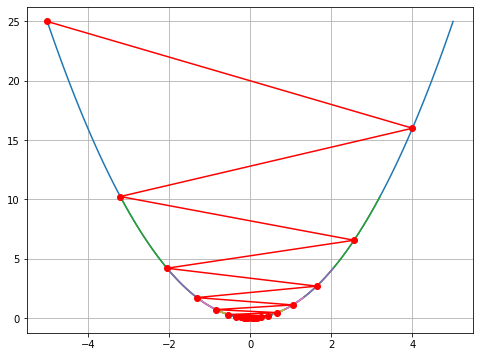

In [163]:
x = np.linspace(xs, np.abs(xs), 100)
plt.figure(figsize=(8,6))
plt.plot(x,y(x))
plt.grid()
_ = plt.plot(xs, y(xs), "-o", c="r")

## $$\textbf{ Cython}$$
<hr> 

* $\text{Cython is a static compiler for Python programming language}$
<br><br>
<center>
    <img src='./images/cython.png' width='300'>

In [1]:
# conda install -c anaconda cython

import cython

%load_ext cython

In [2]:
%%cython -a 
#cython: boundscheck=False, wraparound=False, cdivision=True, nonecheck=False

import numpy as np
cimport numpy as np
cimport cython

cdef float[:,:] fill_(int n, float fill_value):
    
    cdef:
        int i,j
        float[:,:] out = np.empty((n,n), dtype = np.float32)
    
    for i in range(n):
        for j in range(n):   
            out[n,n] = fill_value

    return out


cpdef np.ndarray cdot(float[:,:] X, float[:,:] Y): 
    
    cdef:
        int i,j,k
        int n = len(X)
        float[:,:] Z = fill_(n, 0.)    
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                Z[i,j] += X[i, k] * Y[k, j]
    
    return np.array(Z)

## $$\textbf{ Measure the performance }$$
<hr> 

In [3]:
n = 300
X = np.random.normal(0,1, size=(n,n)).astype(np.float32)
X.shape, X.dtype

cdot(X,X).shape

(300, 300)

In [4]:
%timeit -n 10 -r 3 cdot(X,X)

31.7 ms ± 1.21 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [6]:
fn = lambda X: X @ X 

In [7]:
%timeit -n 10 -r 3 fn(X)

1.52 ms ± 943 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
